In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt
plt.xkcd()
%matplotlib inline

In [2]:
path_file = "data/routes_data.tsv"
routes_df = pd.read_csv(path_file, sep="\t")

In [3]:
routes_df.head()

,id_from,id_to,line_from,station_from,line_to,station_to,route_type,delay
0,0,1,Сокольническая,Бульвар Рокоссовского,Сокольническая,Черкизовская,drive,120
1,1,0,Сокольническая,Черкизовская,Сокольническая,Бульвар Рокоссовского,drive,120
2,1,2,Сокольническая,Черкизовская,Сокольническая,Преображенская площадь,drive,240
3,2,1,Сокольническая,Преображенская площадь,Сокольническая,Черкизовская,drive,240
4,2,3,Сокольническая,Преображенская площадь,Сокольническая,Сокольники,drive,180


In [4]:
G = nx.nx.from_pandas_edgelist(
            routes_df, "id_from", "id_to", ["delay", "station_from", "station_from"]
        )

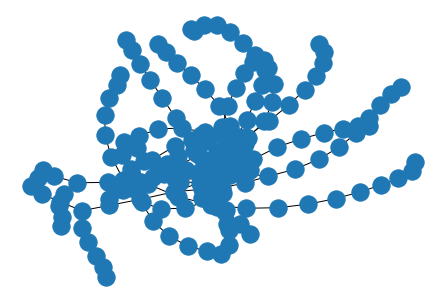

In [5]:
nx.draw(G)

In [6]:
nx.radius(G)

16

In [7]:
nx.diameter(G)

31

In [8]:
G.number_of_nodes()

194

In [9]:
G.number_of_edges()

228

In [10]:
G.degree()

DegreeView({0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 3, 6: 2, 81: 3, 7: 4, 8: 3, 96: 4, 166: 4, 9: 3, 121: 3, 10: 5, 28: 4, 11: 2, 149: 4, 72: 3, 49: 5, 12: 3, 13: 2, 75: 3, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 3, 26: 2, 84: 3, 27: 4, 148: 4, 120: 4, 29: 4, 48: 3, 30: 3, 98: 4, 137: 3, 31: 2, 78: 3, 32: 2, 33: 3, 34: 2, 180: 2, 35: 2, 36: 2, 37: 2, 38: 3, 39: 1, 179: 2, 40: 1, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 4, 80: 4, 167: 4, 50: 2, 51: 4, 52: 2, 86: 4, 69: 5, 53: 2, 54: 3, 55: 2, 62: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 1, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 70: 2, 73: 2, 71: 2, 74: 1, 76: 3, 77: 3, 99: 3, 151: 3, 79: 4, 136: 4, 123: 4, 82: 3, 83: 3, 94: 3, 146: 3, 85: 3, 119: 3, 87: 1, 88: 2, 89: 2, 90: 2, 91: 3, 92: 2, 192: 3, 93: 2, 95: 2, 97: 3, 122: 3, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 1, 111: 1, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 124: 3, 125: 2, 16

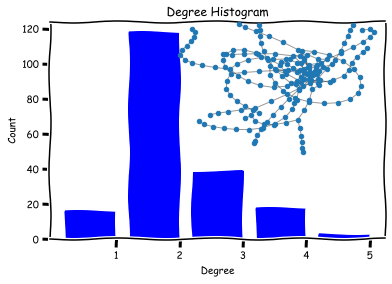

In [11]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

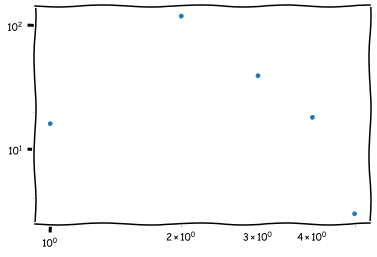

In [12]:
plt.loglog(deg, cnt, '.', lw=2)

From our experimentations we can realise that the Moscow Metrow is a skewed distribution with most nodes having 2 connections. Furthermore it may take multiple stops for one to get from point `A` to point `B` depending on where they are going. Hence passenger `X` may not be affected due to the number of stops they may share in common wih passenger `Y` but rather due to human interactions passenger `X` may have in common with passenger `Y`